<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Volume" data-toc-modified-id="Volume-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Volume</a></span></li><li><span><a href="#The-Distribution-of-Returns" data-toc-modified-id="The-Distribution-of-Returns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The Distribution of Returns</a></span></li></ul></li><li><span><a href="#Financial-Analysis" data-toc-modified-id="Financial-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Financial Analysis</a></span><ul class="toc-item"><li><span><a href="#Value-at-Risk/VaR" data-toc-modified-id="Value-at-Risk/VaR-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Value at Risk/VaR</a></span></li><li><span><a href="#beta/$\beta$" data-toc-modified-id="beta/$\beta$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>beta/$\beta$</a></span></li><li><span><a href="#Price/Earnings-to-Growth-(PEG)-Ratio" data-toc-modified-id="Price/Earnings-to-Growth-(PEG)-Ratio-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Price/Earnings-to-Growth (PEG) Ratio</a></span></li><li><span><a href="#Quick-Ratio" data-toc-modified-id="Quick-Ratio-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Quick Ratio</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 12, 31)

ticker = 'AAPL'

stock_data = web.DataReader(ticker, 'yahoo', start, end)
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.712143
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.083878


## Visualization

### Volume

In [3]:
# Plot volume curve.

# Parameter:
#     stock_data: (DataFrame) stock trading data.

def plot_volume(stock_data):
    ma_volume = stock_data['Volume'].rolling(window=30).mean()
    plt.figure(figsize=(10,6))
    plt.style.use('ggplot')
    plt.plot(stock_data['Volume'])
    plt.plot(ma_volume)
    plt.legend(['Volume', 'Moving Average'], loc='upper right')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

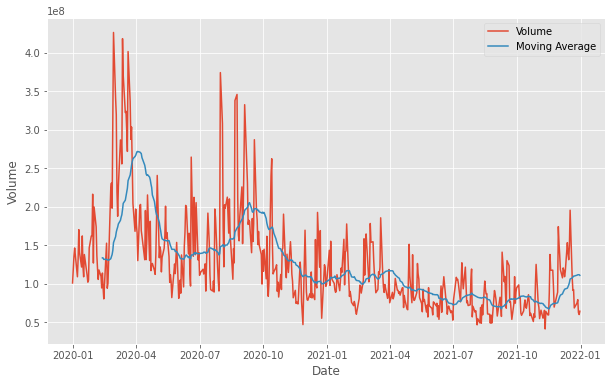

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2019-12-31  73.419998  72.379997  72.482498  73.412498  100805600.0  72.139954
2020-01-02  75.150002  73.797501  74.059998  75.087502  135480400.0  73.785927
2020-01-03  75.144997  74.125000  74.287498  74.357498  146322800.0  73.068565
2020-01-06  74.989998  73.187500  73.447502  74.949997  118387200.0  73.650795
2020-01-07  75.224998  74.370003  74.959999  74.597504  108872000.0  73.304420


pandas.core.frame.DataFrame

In [6]:
# Example
plot_volume(stock_data)
print(stock_data.head())
type(stock_data)

**Financial Knowledge：**  
Trading volume is a measure of how much a given financial asset has traded in a period of time. For stocks, volume is measured in the number of shares traded.  
  
Traders look to volume to determine liquidity and combine changes in volume with technical indicators to make trading decisions.
  
A rising market should see rising volume. Buyers require increasing numbers and increasing enthusiasm to keep pushing prices higher. Increasing price and decreasing volume might suggest a lack of interest, and this is a warning of a potential reversal.  


### The Distribution of Returns

In [8]:
# Plot the distribution of stock returns.

# Parameter:
#     stock_data: (DataFrame) stock trading data.

def plot_return_dis(stock_data):
    hist_count = stock_data.shape[0] // 3
    stock_data['Returns'] = stock_data['Close'].pct_change()
    plt.figure(figsize=(8, 4))
    stock_data['Returns'].plot.hist(bins=hist_count)
    plt.xlabel('Stock Returns')
    plt.ylabel('Frequency')
    plt.title('The Distribution of Stock Returns')
    plt.show()

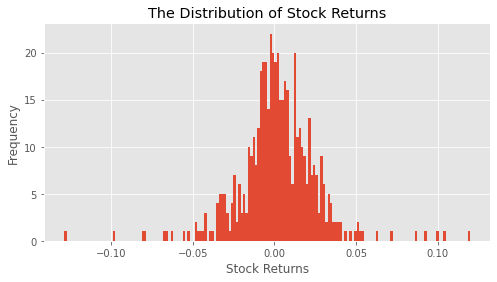

                 High        Low       Open      Close       Volume  \
Date                                                                  
2019-12-31  73.419998  72.379997  72.482498  73.412498  100805600.0   
2020-01-02  75.150002  73.797501  74.059998  75.087502  135480400.0   
2020-01-03  75.144997  74.125000  74.287498  74.357498  146322800.0   
2020-01-06  74.989998  73.187500  73.447502  74.949997  118387200.0   
2020-01-07  75.224998  74.370003  74.959999  74.597504  108872000.0   

            Adj Close   Returns  
Date                             
2019-12-31  72.139954       NaN  
2020-01-02  73.785927  0.022816  
2020-01-03  73.068565 -0.009722  
2020-01-06  73.650795  0.007968  
2020-01-07  73.304420 -0.004703  


pandas.core.frame.DataFrame

In [9]:
# Example
plot_return_dis(stock_data)

print(stock_data.head())
type(stock_data)

**Financial Knowledge：**    
This plot exhibits the distribution of stock returns.  
   
Stock market returns are not normally distributed. Instead, we think of them as having fat tails (i.e. extreme events happen more frequently than expected).  
  
A fatter tail indicates that extreme returns take place more frequently. We usually think such stock to be of high risk.



## Financial Analysis

### Value at Risk/VaR
By assessing the amount of potential loss, the probability of occurrence for the amount of loss, and the timeframe, we can get an approximate number to help our users to make decisions.

In [7]:
import scipy.stats as stats
import math

In [8]:
# Calculate VaR

# Parameter:
#     days: (int) timeframe
#     confidence: the probability of occurrence
#     date: the benchmark day
#     stock_data: (DataFrame) stock trading data


def cal_VaR(days, confidence, date, stock_data):
    share_price = stock_data['Close'][date]
    Z_value = stats.norm.ppf(abs(1 - confidence))
    mean_return_rate = stock_data['Close'].pct_change().mean()
    std_return_rate = stock_data['Close'].pct_change().std()
    
    rel_VaR = math.sqrt(days) * share_price * Z_value * std_return_rate 
    return rel_VaR

In [9]:
# Example
VaR = cal_VaR(2, 0.99, '2021-12-31', stock_data)
print(VaR)

-12.553582291458538


**Financial Analysis：**  
Value at risk (VaR) is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame.  
    
We use variance-covariance method to evaluate VaR based on Efficient Market Hypothesis (EMH). Specifically speaking, instead of assuming the past will inform the future, this method assumes that gains and losses are normally distributed. This way, potential losses can be framed in terms of standard deviation events from the mean.

### beta/$\beta$

In [10]:
# Calculate and compare Beta

# Parameter:
#     ticker: (str) stock symbol
#     beta_tuple: (tuple) a tuple of betas

def analyze_beta(ticker, beta_tuple):
    dataList = list(beta_tuple)
    df = pd.DataFrame(dataList, columns=['ticker', 'beta'])
    df = df.sort_values(by='beta', ascending=False)
    df = df.reset_index(drop=True)
    stock_count = df.shape[0]
    beta_rank = df[df['ticker'] == ticker].index.tolist()[0]
    
    beta_pos = (beta_rank + 1) / stock_count
    print("Beta Rank:", str(beta_pos * 100) + '%')
    
    # bid beta
    if beta_pos >= 0.7:
        print('This stock has a relatively high beta, which tends to move with more momentum than others.')
        print('You may have larger possibility to get more profit, while you have to tolerate more risk.')
    # small beta
    elif beta_pos <= 0.3:
        print('This stock has a relatively low beta, which tends to move with less momentum than others.')
        print('You may have a stable profit, while the possibility to get big profit is small.')
    else:
        # moderate beta
        print('This stock has a moderate beta.')

In [11]:
# Example

beta_tuple = (('Facebook', 0.5),
        ('Alphabet', 1),
        ('Amazon', 1.2),
        ('Apple', 0.4),
        ('MSFT', 0.75))

analyze_beta('MSFT', beta_tuple)
print('')
analyze_beta('Amazon', beta_tuple)

Beta Rank: 60.0%
This stock has a moderate beta.

Beta Rank: 20.0%
This stock has a relatively low beta, which tends to move with less momentum than others.
You may have a stable profit, while the possibility to get big profit is small.


**Financial Analysis:**   
Beta (β) is a measure of the volatility—or systematic risk—of a security or portfolio compared to the market as a whole (usually the S&P 500). Stocks with betas higher than 1.0 can be interpreted as more volatile than the S&P 500.  
     
If a stock has a beta of 1.0, it indicates that its price activity is strongly correlated with the market.
  
A beta value that is less than 1.0 means that the security is theoretically less volatile than the market. Including this stock in a portfolio makes it less risky than the same portfolio without the stock.  
  
A beta that is greater than 1.0 indicates that the security's price is theoretically more volatile than the market. For example, if a stock's beta is 1.2, it is assumed to be 20% more volatile than the market. Technology stocks and small cap stocks tend to have higher betas than the market benchmark. This indicates that adding the stock to a portfolio will increase the portfolio’s risk, but may also increase its expected return.
     
Some stocks have negative betas. A beta of -1.0 means that the stock is inversely correlated to the market benchmark on a 1:1 basis. This stock could be thought of as an opposite, mirror image of the benchmark’s trends.

### Price/Earnings-to-Growth (PEG) Ratio

In [19]:
# Calculate and compare PEG Ratio

# Parameter:
#     ticker: (str) stock symbol
#     pegr_tuple: (tuple) a tuple of PEG Ratios

def analyze_pegr(ticker, pegr_tuple):
    dataList = list(pegr_tuple)
    df = pd.DataFrame(dataList, columns=['ticker', 'peg ratio'])
    df = df.sort_values(by='peg ratio', ascending=False)
    df = df.reset_index(drop=True)
#     print(df)

    stock_count = df.shape[0]
    pegr_rank = df[df['ticker'] == ticker].index.tolist()[0]
    
    pegr_pos = (pegr_rank + 1) / stock_count
    print("PEG Ratio Rank:", str(pegr_pos * 100) + '%')
    
    # peg ratio比较大
    if pegr_pos >= 0.7:
        print('This stock has a relatively high PEG, which may indicate that a stock is overvalued.')
    # 比较小
    elif pegr_pos <= 0.3:
        print('This stock has a relatively low PEG, which may indicate that a stock is undervalued.')
    else:
        print('This stock has a moderate PEG.')

In [20]:
# Example

pegr_tuple = (('Facebook', 1.7),
        ('Alphabet', 1.2),
        ('Amazon', 2.2),
        ('Apple', 0.98),
        ('MSFT', 1))

analyze_pegr('Amazon', pegr_tuple)
print('')
analyze_pegr('Apple', pegr_tuple)

PEG Ratio Rank: 20.0%
This stock has a relatively low PEG, which may indicate that a stock is undervalued.

PEG Ratio Rank: 100.0%
This stock has a relatively high PEG, which may indicate that a stock is overvalued.


**Financial Analysis：**  
The price/earnings to growth ratio (PEG ratio) is a stock's price-to-earnings (P/E) ratio divided by the growth rate of its earnings for a specified time period. The PEG ratio is used to determine a stock's value while also factoring in the company's expected earnings growth, and it is thought to provide a more complete picture than the more standard P/E ratio.  
  
The lower the PEG ratio, the more the stock may be undervalued given its future earnings expectations.   
  
It is believed that a company's P/E and expected growth should be equal, which denotes a fairly valued company and supports a PEG ratio of 1.0. When a company's PEG exceeds 1.0, it's considered overvalued while a stock with a PEG of less than 1.0 is considered undervalued.  


### Quick Ratio

In [55]:
# Calculate and compare Quick Ratio

# Parameter:
#     ticker: (str) stock symbol
#     beta_tuple: (tuple) a tuple of quick ratios
def analyze_qr(ticker, qr_tuple):
    dataList = list(qr_tuple)
    df = pd.DataFrame(dataList, columns=['ticker', 'quick ratio'])
    df = df.sort_values(by='quick ratio', ascending=False)
    df = df.reset_index(drop=True)

    stock_count = df.shape[0]
    index = df[df['ticker'] == ticker].index.tolist()[0]
    quick_ratio = df.iat[index, 1]
    print("Quick Ratio:", quick_ratio)
    
    # quick ratio比较大，公司完全配备了足够的资产，可以立即清算以偿还流动负债
    if quick_ratio < 1:
        print("WARNING: This company has a quick ratio of less than 1, which indicates that it not be able to fully pay off its current liabilities in the short term.")
    else:
        print("This company has a quick ratio of no less than 1, which indicates that it fully equipped with enough assets to be instantly liquidated to pay off its current liabilities.")

In [58]:
# Example

qr_tuple = (('Facebook', 1.7),
        ('Alphabet', 1.13),
        ('Amazon', 1.2),
        ('Apple', 0.98),
        ('MSFT', 0.5))

analyze_qr('MSFT', qr_tuple)
print("")
analyze_qr('Facebook', qr_tuple)

Quick Ratio: 0.5

Quick Ratio: 1.7
This company has a quick ratio of no less than 1, which indicates that it fully equipped with enough assets to be instantly liquidated to pay off its current liabilities.


**Financial Analysis：**  
The quick ratio is an indicator of a company’s short-term liquidity position and measures a company’s ability to meet its short-term obligations with its most liquid assets.  
  
The higher the ratio result, the better a company's liquidity and financial health; the lower the ratio, the more likely the company will struggle with paying debts.  
  
A result of 1 is considered to be the normal quick ratio. It indicates that the company is fully equipped with exactly enough assets to be instantly liquidated to pay off its current liabilities. A company that has a quick ratio of less than 1 may not be able to fully pay off its current liabilities in the short term, while a company having a quick ratio higher than 1 can instantly get rid of its current liabilities. For instance, a quick ratio of 1.5 indicates that a company has $\$1.50$ of liquid assets available to cover each $\$1$ of its current liabilities.